# imports


In [22]:
import os, glob
from functools import reduce
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

max_node_load_path = '/max(node_load15{hostname=~_water401_water427_water428_water449_}) by (domain)'
p99_path = '/p99_water401_water427_water428_water449'
sum_path = '/sum(rate(TRC_server_timer_count{_label_1=_recommendationRequests_, service=_taboola-trc)'
max_over_time_path = '/max(max_over_time(TRC_server_gauge{server=~_water401_water427_water428_water449_)'
avg_node_load15_path = '/avg(node_load15{hostname=~_water401_water427_water428_water449_}) by (domain)'
avg_count_node_cpu_seconds_path = '/avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_water401_water427_water428_water449_,job=~_node_exporter_}) by (hostname))'
avg_over_time_path = '/avg(avg_over_time(TRC_server_gauge{server=label_1=_MemoryUsage)'
avg_node_memory_path = '/avg(avg(node_memory_MemTotal_bytes{hostname=~_water401_water427_water428_water449_})) by (hostname)'

paths = [[max_node_load_path, 'max_node_CPU_load -CPU'], [p99_path, 'p99'], [sum_path, 'sum recoRate']
    , [max_over_time_path, 'max_HEAP-mem usage'], [avg_node_load15_path, 'avg_node_CPU_load'],
          [avg_over_time_path, 'avg_HEAP- mem usage']]

data_path = 'Data/Single servers/AM/'
cores_40_path = '40 cores 187.35 GB'
cores_40_path_copy = '40 cores 187.35 GB - Copy'
a4_dims = (11.7, 8.27)


In [23]:
def getCsv(data_path, core_path, metric_path, name_of_metric):
    all_files = glob.glob(os.path.join(data_path + core_path + metric_path, "*.csv"))
    all_csv = (pd.read_csv(f, sep=',') for f in all_files)
    new_csv = pd.concat(all_csv, ignore_index=True)
    new_csv.columns = ['dates', name_of_metric]
    return new_csv

In [24]:
csv_data_40_cores_6_days = [getCsv(data_path, cores_40_path_copy, path[0], path[1]) for path in paths]
csv_data_40_cores_6_days = reduce(lambda left, right: pd.merge(left, right, on=['dates'],
                                                        how='outer'), csv_data_40_cores_6_days)

csv_data_40_cores = [getCsv(data_path, cores_40_path, path[0], path[1]) for path in paths]
csv_data_40_cores = reduce(lambda left, right: pd.merge(left, right, on=['dates'],
                                                        how='outer'), csv_data_40_cores)

csv_data_40_cores = csv_data_40_cores.dropna()


# sacle - manual 

In [25]:
data_to_scale = csv_data_40_cores_6_days.drop('dates', 1)

normalized_df=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df = normalized_df.merge(
    right=csv_data_40_cores_6_days['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df = normalized_df.melt('dates', var_name='all_data- 6 days',  value_name='vals')

In [26]:

data_to_scale = csv_data_40_cores.drop('dates', 1)
normalized_df_all_dates=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df_all_dates = normalized_df_all_dates.merge(
    right=csv_data_40_cores['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df_all_dates_graph = normalized_df_all_dates.melt('dates', var_name='all_data',  value_name='vals')

# all_metrics- 6 days - normalized

(0.0, 1814.4)

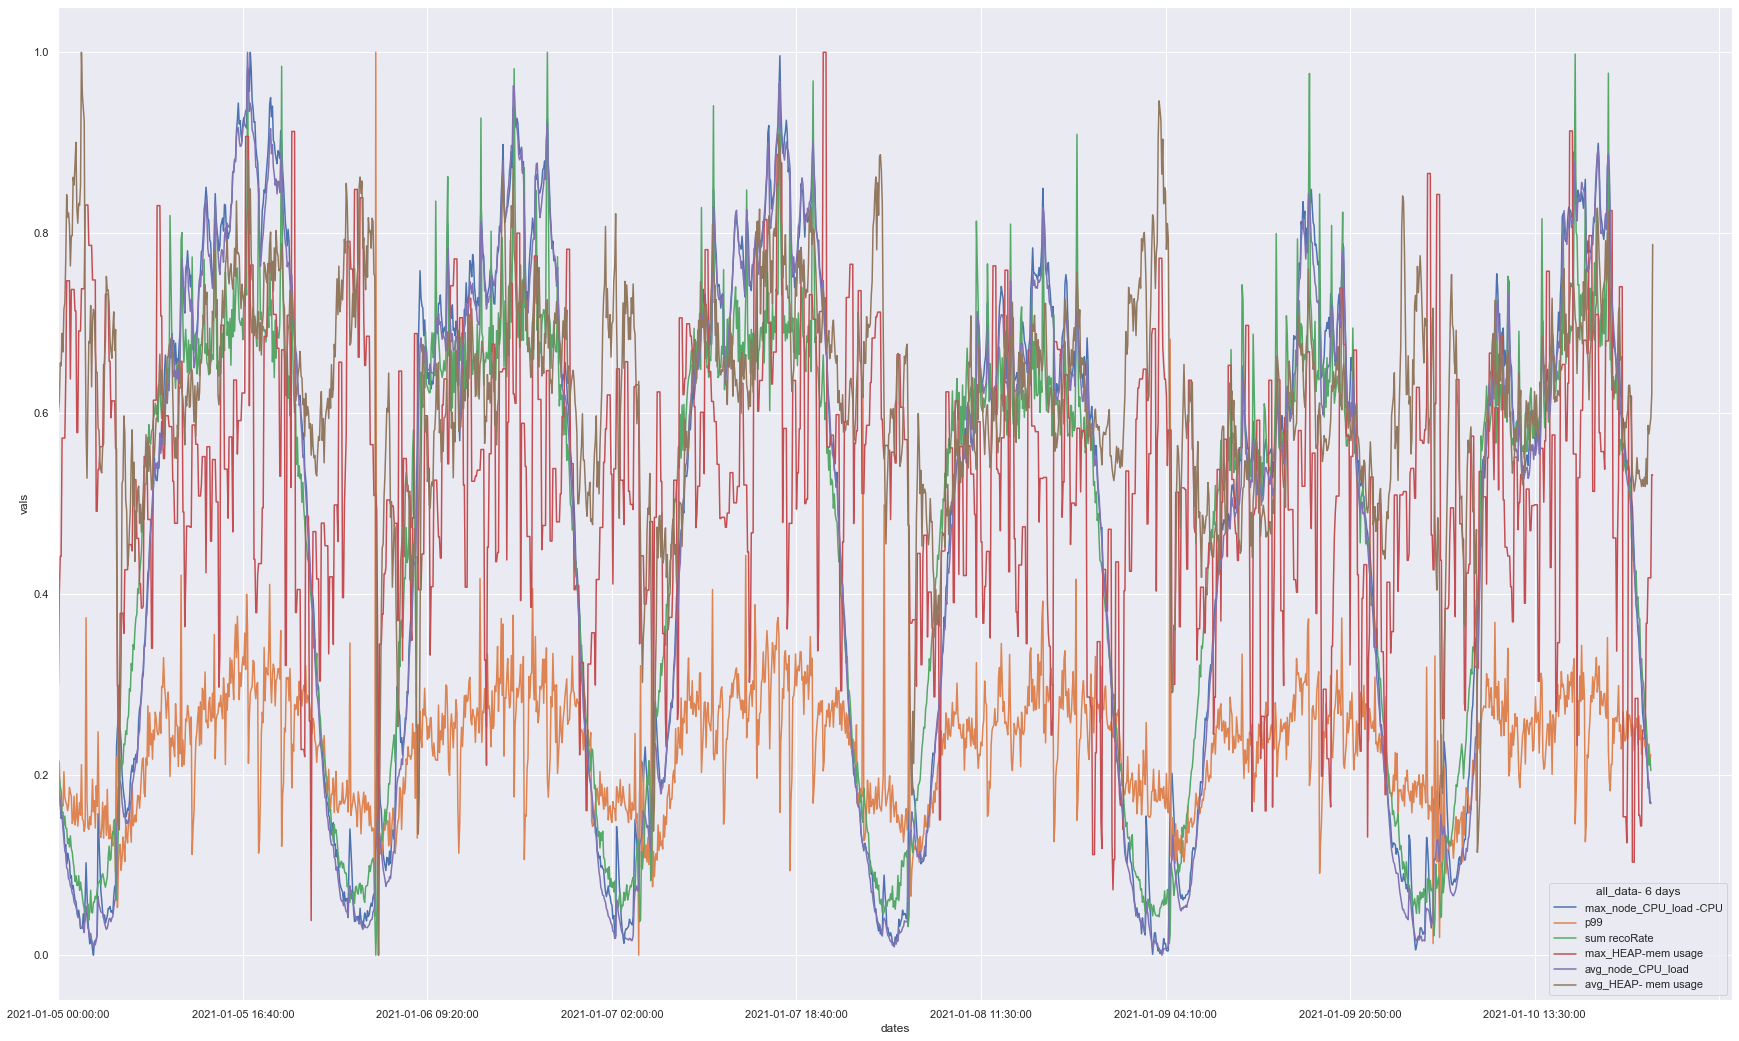

In [6]:
sns.set(rc={'figure.figsize': (30, 18.27)})
g = sns.lineplot(x="dates", y="vals", hue='all_data- 6 days', data=normalized_df)
g.xaxis.set_major_locator(MultipleLocator(200))
plt.xlim(0)


# all_metrics - normalized

In [27]:
normalized_df_all_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21256 entries, 0 to 21330
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_node_CPU_load -CPU  21256 non-null  float64
 1   p99                     21256 non-null  float64
 2   sum recoRate            21256 non-null  float64
 3   max_HEAP-mem usage      21256 non-null  float64
 4   avg_node_CPU_load       21256 non-null  float64
 5   avg_HEAP- mem usage     21256 non-null  float64
 6   dates                   21256 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


# heat_map

<AxesSubplot:>

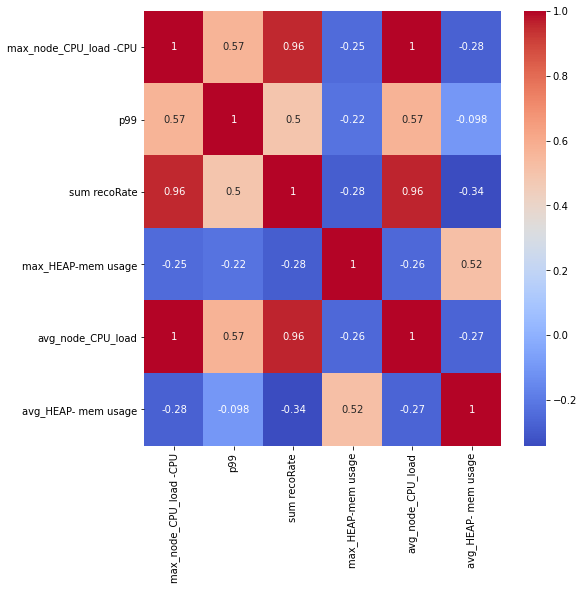

In [28]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(normalized_df_all_dates.corr(), annot = True,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'max_node_CPU_load -CPU'}>,
        <AxesSubplot:title={'center':'p99'}>],
       [<AxesSubplot:title={'center':'sum recoRate'}>,
        <AxesSubplot:title={'center':'max_HEAP-mem usage'}>],
       [<AxesSubplot:title={'center':'avg_node_CPU_load'}>,
        <AxesSubplot:title={'center':'avg_HEAP- mem usage'}>]],
      dtype=object)

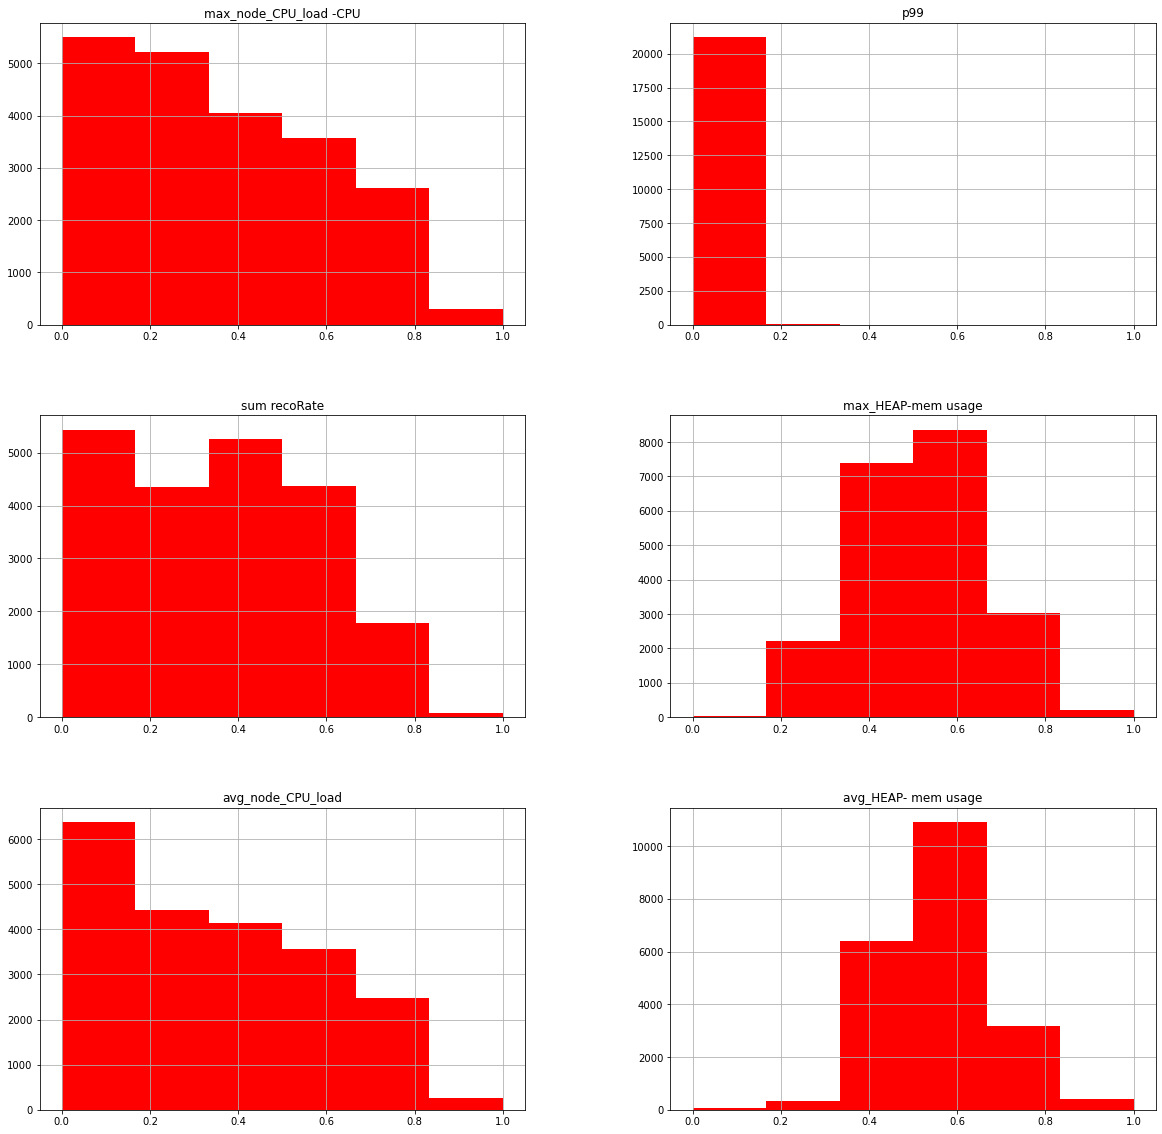

In [29]:
normalized_df_all_dates.hist(bins = 6, figsize = (20,20), color = 'r')

# all_metrics 

In [30]:
normalized_df_all_dates_graph.info

<bound method DataFrame.info of                       dates                all_data      vals
0       2021-01-05 00:00:00  max_node_CPU_load -CPU  0.234670
1       2021-01-05 00:05:00  max_node_CPU_load -CPU  0.212495
2       2021-01-05 00:10:00  max_node_CPU_load -CPU  0.205168
3       2021-01-05 00:15:00  max_node_CPU_load -CPU  0.191091
4       2021-01-05 00:20:00  max_node_CPU_load -CPU  0.193791
...                     ...                     ...       ...
127531  2021-03-06 23:40:00     avg_HEAP- mem usage  0.662139
127532  2021-03-06 23:45:00     avg_HEAP- mem usage  0.668614
127533  2021-03-06 23:50:00     avg_HEAP- mem usage  0.690741
127534  2021-03-06 23:55:00     avg_HEAP- mem usage  0.689121
127535  2021-03-07 00:00:00     avg_HEAP- mem usage  0.701146

[127536 rows x 3 columns]>

<AxesSubplot:>

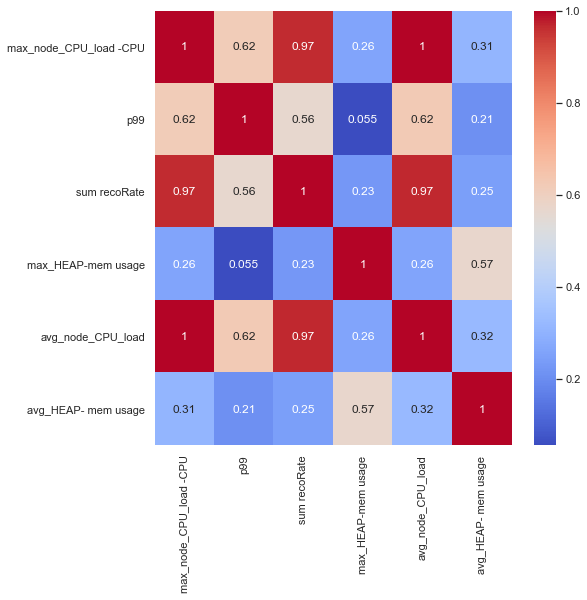

In [13]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(csv_data_40_cores.corr(), annot = True,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'max_node_CPU_load -CPU'}>,
        <AxesSubplot:title={'center':'p99'}>],
       [<AxesSubplot:title={'center':'sum recoRate'}>,
        <AxesSubplot:title={'center':'max_HEAP-mem usage'}>],
       [<AxesSubplot:title={'center':'avg_node_CPU_load'}>,
        <AxesSubplot:title={'center':'avg_HEAP- mem usage'}>]],
      dtype=object)

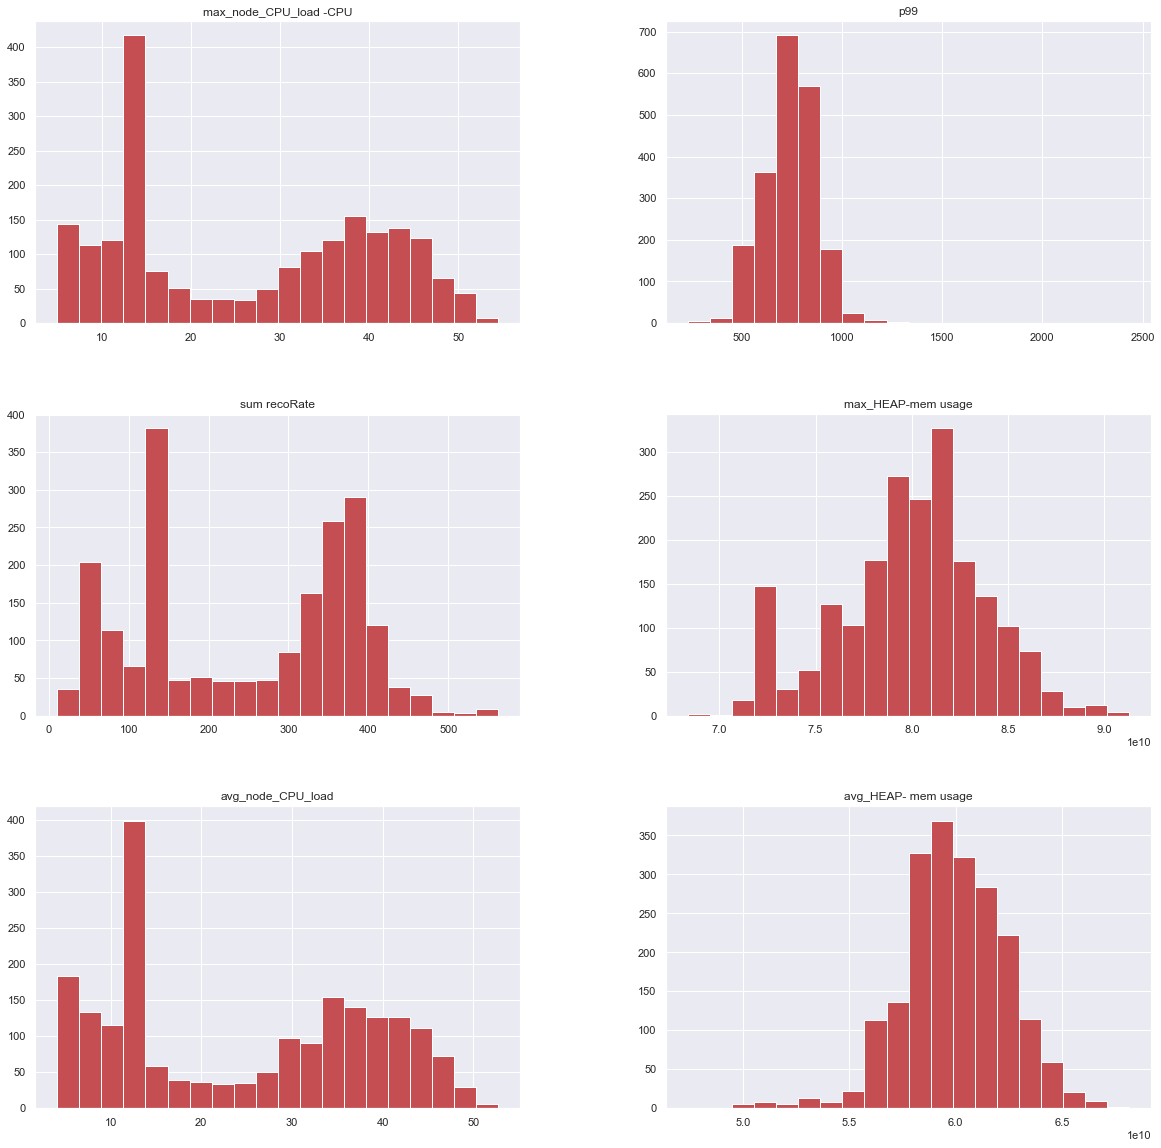

In [12]:
csv_data_40_cores.hist(bins = 20, figsize = (20,20), color = 'r')

## all_metrics- PLOT - normalized

In [31]:
csv_data_40_cores.info


<bound method DataFrame.info of                      dates  max_node_CPU_load -CPU         p99  sum recoRate  \
0      2021-01-05 00:00:00                   14.79  707.885317    124.578083   
1      2021-01-05 00:05:00                   13.64  701.891404    119.825000   
2      2021-01-05 00:10:00                   13.26  604.822940    113.920833   
3      2021-01-05 00:15:00                   12.53  582.867215    110.862500   
4      2021-01-05 00:20:00                   12.67  600.789308     97.733333   
...                    ...                     ...         ...           ...   
21326  2021-03-06 23:40:00                   13.55  679.586882    119.679167   
21327  2021-03-06 23:45:00                   13.40  669.693533    114.483098   
21328  2021-03-06 23:50:00                   13.03  656.414254    114.516886   
21329  2021-03-06 23:55:00                   12.52  673.263079     99.341455   
21330  2021-03-07 00:00:00                   12.85  676.219142    110.487500   

       

(0.0, 18348.75)

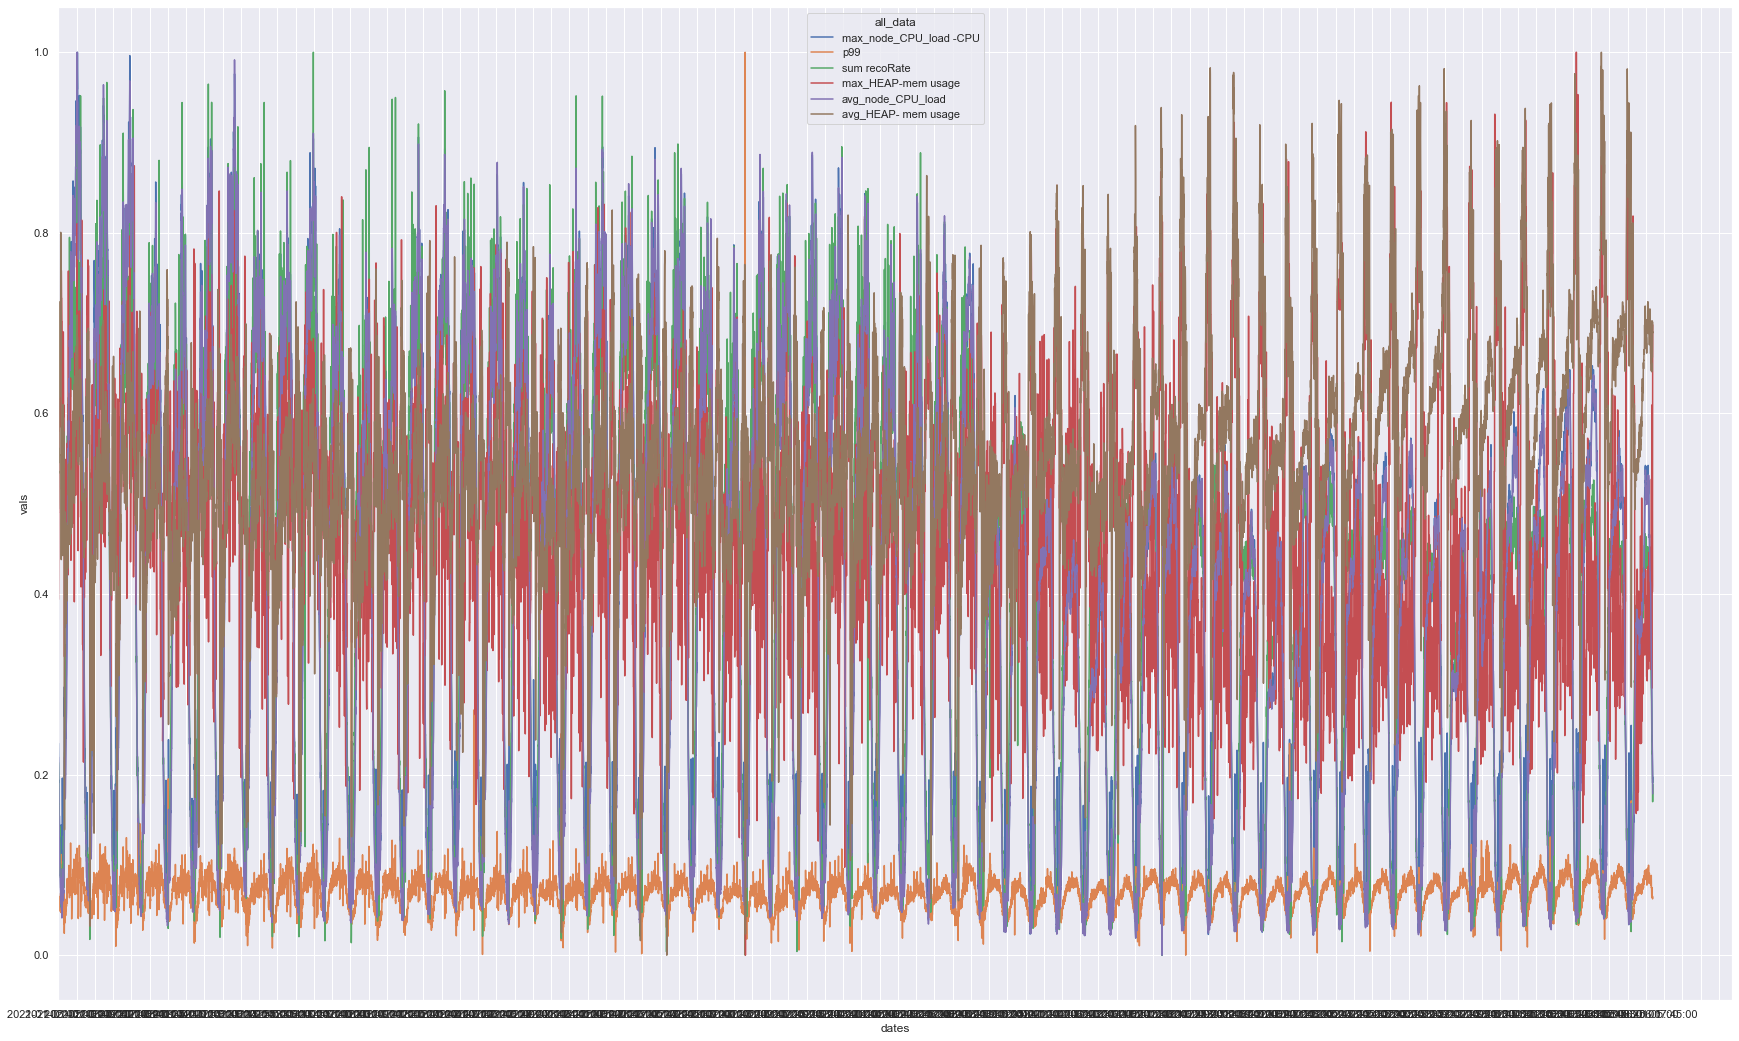

In [33]:
sns.set(rc={'figure.figsize': (30, 18.27)})
g = sns.lineplot(x="dates", y="vals", hue='all_data', data=normalized_df_all_dates_graph)
g.xaxis.set_major_locator(MultipleLocator(200))
plt.xlim(0)
